In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.shape

(1470, 35)

In [ ]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
#drop the unnecessary columns
df.drop(['EmployeeNumber','Over18','StandardHours','EmployeeCount'],axis=1,inplace=True)

In [ ]:
attrition = df[df['Attrition'] == 1]
no_attrition = df[df['Attrition']==0]

In [ ]:
#'EnviornmentSatisfaction', 'JobInvolvement', 'JobSatisfacction', 'RelationshipSatisfaction', 'WorklifeBalance' can be clubbed into a single feature 'TotalSatisfaction'

df['Total_Satisfaction'] = (df['EnvironmentSatisfaction'] +
                            df['JobInvolvement'] +
                            df['JobSatisfaction'] +
                            df['RelationshipSatisfaction'] +
                            df['WorkLifeBalance']) /5



In [ ]:
df.drop(['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance'], axis=1, inplace=True)

In [ ]:
df.Total_Satisfaction.describe()

count    1470.000000
mean        2.730748
std         0.428551
min         1.200000
25%         2.400000
50%         2.800000
75%         3.000000
max         4.000000
Name: Total_Satisfaction, dtype: float64

In [ ]:
# Convert Total satisfaction into boolean
# median = 2.8
# x = 1 if x >= 2.8

df['Total_Satisfaction_bool'] = df['Total_Satisfaction'].apply(lambda x:1 if x>=2.8 else 0 )


In [ ]:
convert_category = ['BusinessTravel','Education','EducationField','MaritalStatus','StockOptionLevel','OverTime','Gender','TrainingTimesLastYear']
for col in convert_category:
        df[col] = df[col].astype('category')

In [ ]:
#separate the categorical and numerical data
X_categorical = df.select_dtypes(include=['category'])
X_numerical = df.select_dtypes(include=['int64'])
X_numerical.drop('Attrition', axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
for column in X_numerical.columns:
    if X_numerical[column].dtype == np.float64:
            continue
    X_numerical[column] = LabelEncoder().fit_transform(X_numerical[column])

In [ ]:
y = df['Attrition']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# One HOt Encoding Categorical Features

onehotencoder = OneHotEncoder()

X_categorical = onehotencoder.fit_transform(X_categorical).toarray()
X_categorical = pd.DataFrame(X_categorical)
X_categorical

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
#concat the categorical and numerical values

X_all = pd.concat([X_categorical, X_numerical], axis=1)
X_all.head()

,0,1,2,3,4,5,6,7,8,9,...,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Total_Satisfaction_bool
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,999,8,0,0,8,6,4,0,5,0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1328,1,12,1,10,10,7,1,7,1
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,18,6,4,0,7,0,0,0,0,1
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1228,1,0,0,8,8,7,3,0,1
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,846,9,1,0,6,2,2,2,2,0


<ipython-input-188-cc6310b59a67>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.0%')


<Axes: >

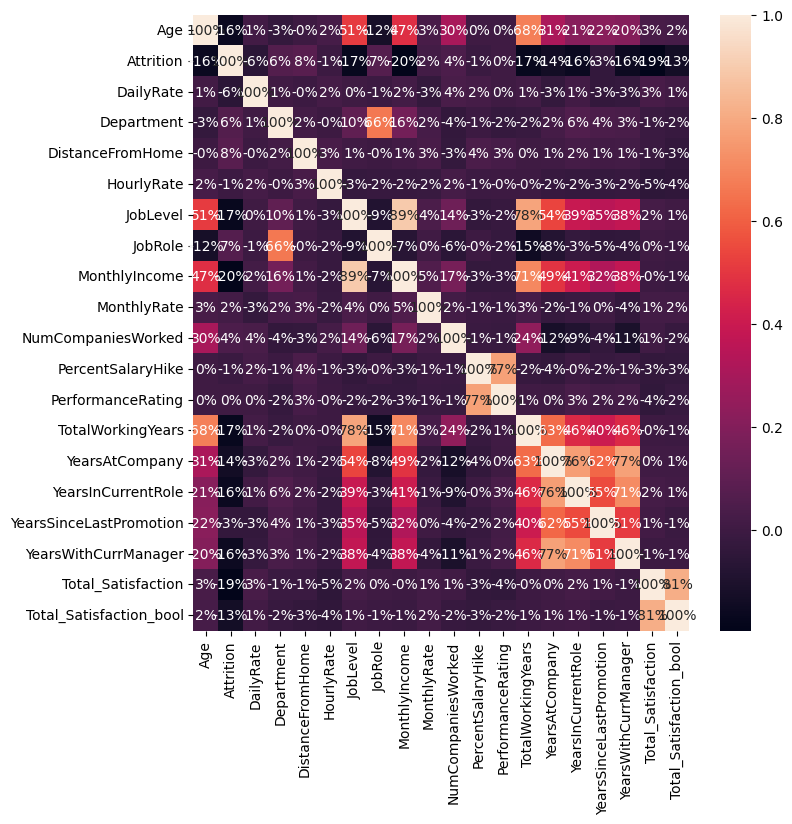

In [188]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Attrition', axis=1),
                                                   df['Attrition'], test_size=0.30)

In [ ]:
# machine learning
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train,y_train,cv):

  # One Pass
  model = algo.fit(X_train, y_train)
  acc = round(model.score(X_train, y_train) * 100, 2)

  # Cross Validation
  train_pred = model_selection.cross_val_predict(algo,X_train,y_train,cv=cv,n_jobs = -1)

  # Cross-validation accuracy metric
  acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)


  return train_pred, acc, acc_cv

SUPPORT VECTOR MACHINE

In [ ]:
train_pred_svc, acc_svc, acc_cv_svc = fit_ml_algo(SVC(),X_train,y_train,10)

print("Accuracy: %s" % acc_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_svc)



Accuracy: 83.38
Accuracy CV 10-Fold: 83.38


**RANDOM FOREST**

In [ ]:
train_pred_rf, acc_rf, acc_cv_rf = fit_ml_algo(RandomForestClassifier(n_estimators=100),X_train, y_train,10)

print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
#print("Running Time: %s" % datetime.timedelta(seconds=rf_time))


Accuracy: 100.0
Accuracy CV 10-Fold: 85.71


**NAIVE BAYES**

In [ ]:
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(),X_train,y_train,10)

print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)

Accuracy: 76.87
Accuracy CV 10-Fold: 76.97
